<a href="https://colab.research.google.com/github/ramank123/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title** : **Yes Bank Stock Closing Prediction**

**Yes Bank Stock Closing Prediction Dataset Contains Columns namely**

**1) Date** - **We Will use it as Index**

**2) Open**- **Opening Price of Stock on Particular Day**

**3) High**- **Highest Price of Stock on Particular Day**

**4) Low**- **Lowest Price of Stock on Particular Day**

**5) Close** -**Closing Price of Stock on Particular Day**

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## **Load Dataset**

In [361]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices (1).csv')

In [363]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [364]:
df.shape

(185, 5)

In [365]:
df.info

<bound method DataFrame.info of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

In [366]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [367]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [368]:
len(df[df.duplicated()])

0

**There is no Duplicate Value present in Dataset.**

In [369]:
#importing datetime
from datetime import datetime 
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [370]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [371]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

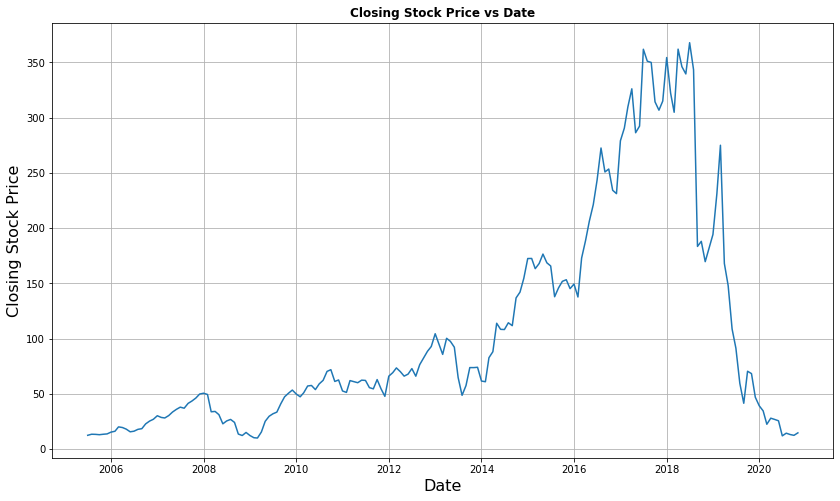

In [372]:
# Trend of Dependent Variable 
plt.figure(figsize = (14,8))
plt.grid(True)
plt.title('Closing Stock Price vs Date',fontweight = 'bold')
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price',fontsize = 16)
plt.show()

Text(0, 0.5, 'Density')

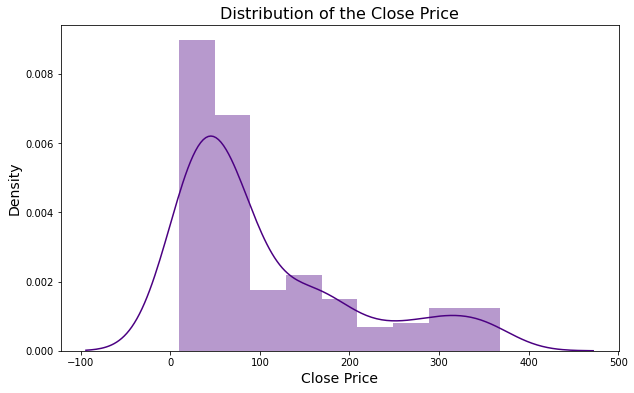

In [373]:
#Distribution of Dependent Variable 
plt.figure(figsize = (10,6))
sns.distplot(df['Close'],color = 'indigo')
plt.title('Distribution of the Close Price',fontsize = 16)
plt.xlabel('Close Price',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

Text(0.5, 1.0, 'Distribution of the Close Price after log transformation')

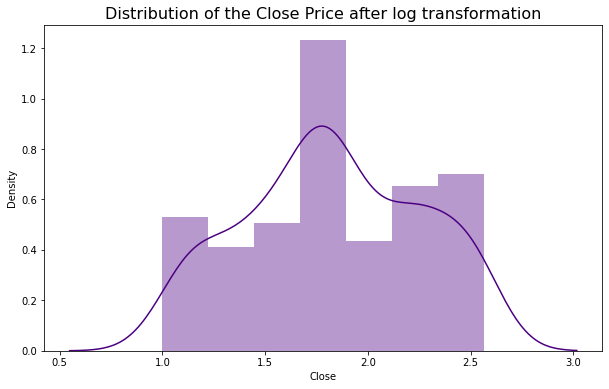

In [374]:
#Distribution after applying Log Transformation
plt.figure(figsize = (10,6))
sns.distplot(np.log10(df['Close']),color = 'indigo')
plt.title('Distribution of the Close Price after log transformation',fontsize = 16)

In [375]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


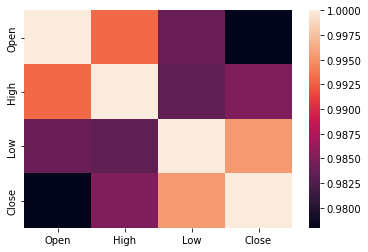

In [376]:
sns.heatmap(df.corr())

# **Split Data**

In [377]:
X=df[['Open', 'High', 'Low']]
y=df['Close']

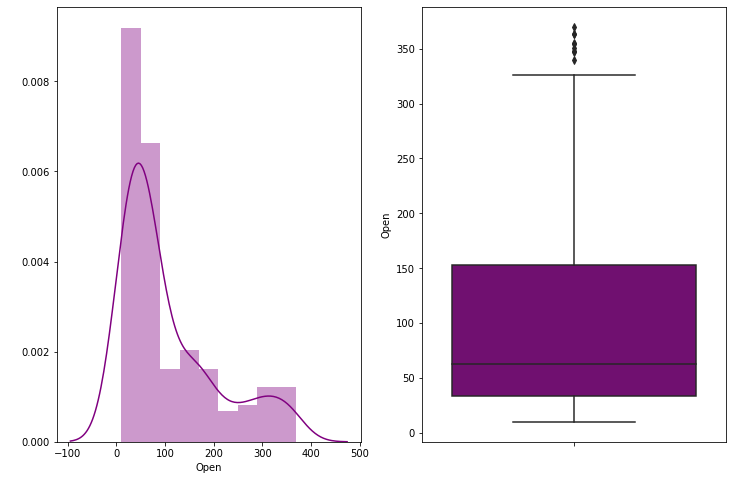

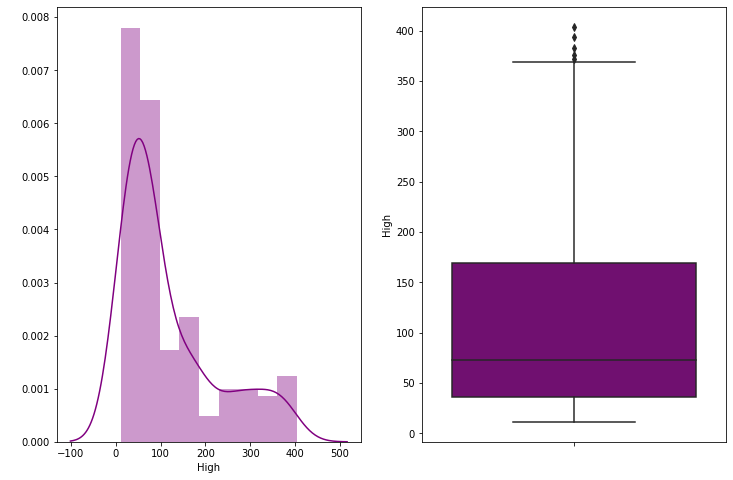

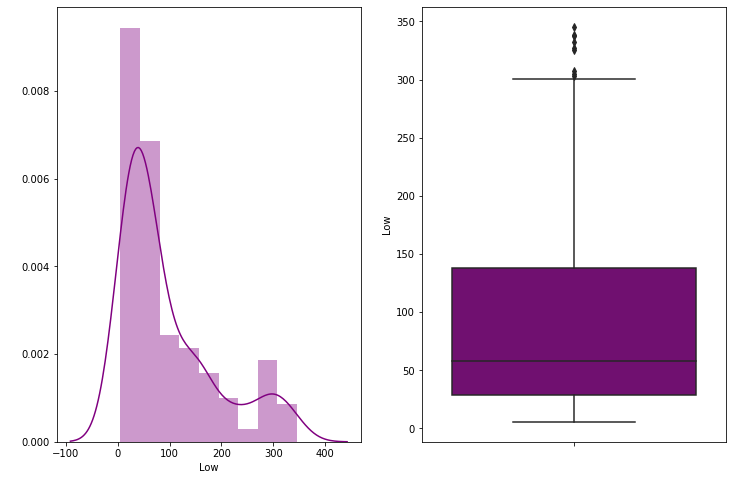

In [378]:
#Plot for Independent Variable
for var in X:
    plt.figure(figsize=(12,8))

    plt.subplot(1, 2, 1)
    fig = sns.distplot(x=df[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df[var],color='purple')
    fig.set_xlabel('')
    fig.set_ylabel(var)

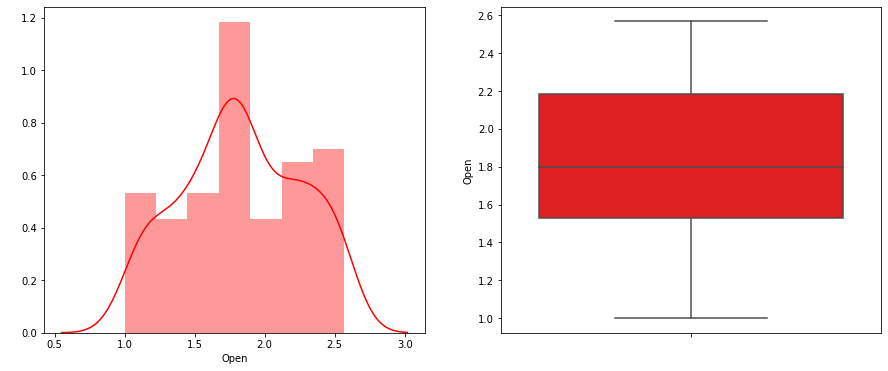

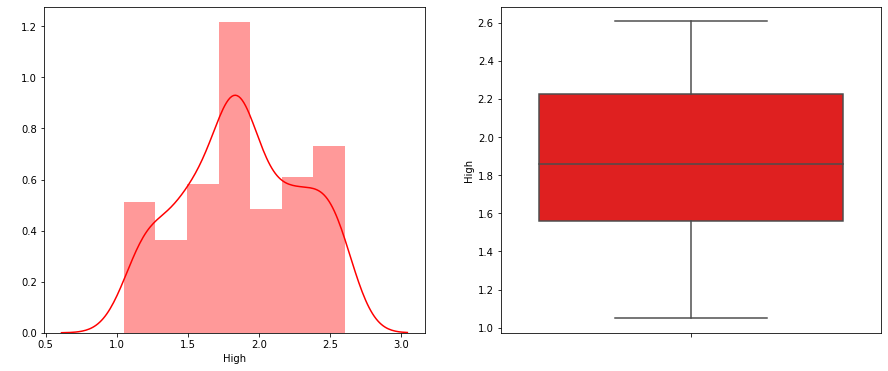

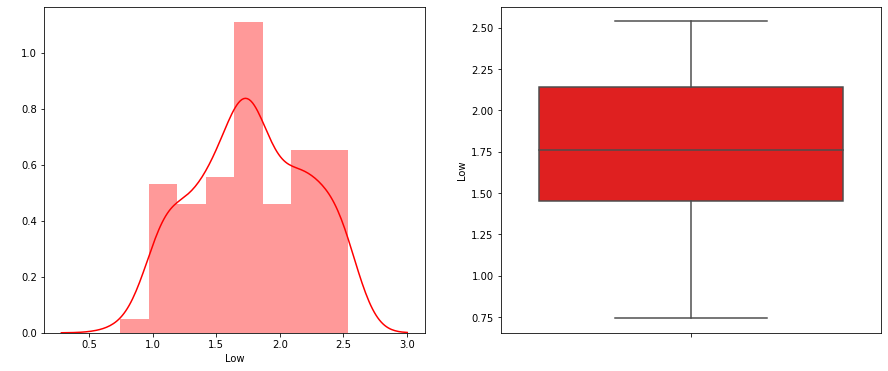

In [379]:
#Plot for Independent Variables
for var in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df[var]),color='red')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df[var]),color='red')
    fig.set_title('')
    fig.set_ylabel(var)

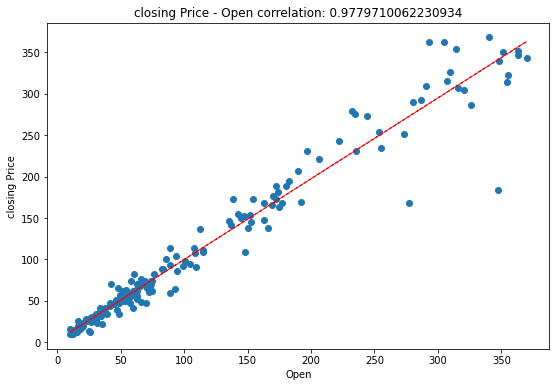

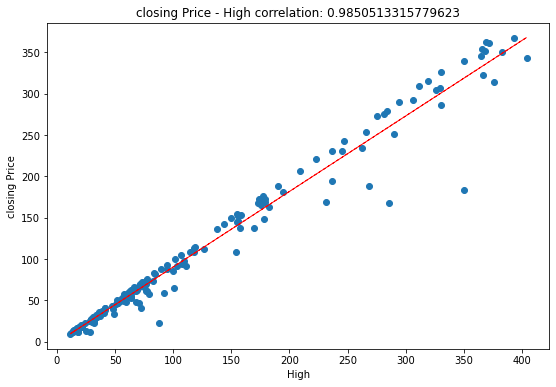

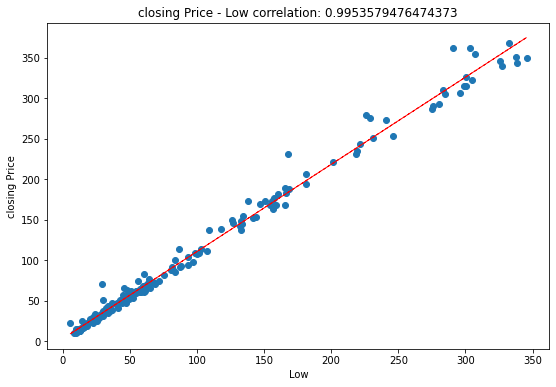

In [380]:
#Checking the Correlation with Dependent Varible
for col in X:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

In [381]:

#adding month column
df['Month'] = df['Date'].apply(lambda y: y.strftime('%B'))
#introducing new features of name year
df['Year'] = df['Date'].apply(lambda z: z.strftime('%Y'))

In [382]:
#Making date column as index
df.index = df['Date']
df.drop('Date',axis = 1,inplace = True)

In [383]:
df.head(3)

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,July,2005
2005-08-01,12.58,14.88,12.55,13.42,August,2005
2005-09-01,13.48,14.87,12.27,13.30,September,2005


In [384]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
future_months = 1
df['Prediction'] = df[['Close']].shift(-future_months)               # Shift() Function shifts index by the desired number of periods
df.head(3)

,Open,High,Low,Close,Month,Year,Prediction
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,July,2005,13.42
2005-08-01,12.58,14.88,12.55,13.42,August,2005,13.30
2005-09-01,13.48,14.87,12.27,13.30,September,2005,12.99


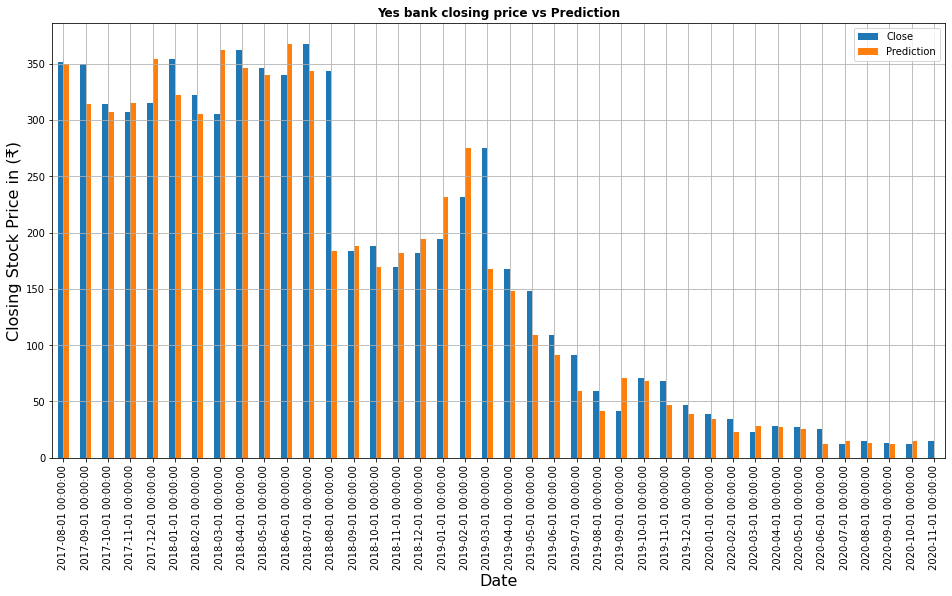

In [385]:
#Closing price vs prediction
df[['Close','Prediction']].tail(40).plot(kind='bar',figsize=(16,8))                  
plt.grid(True)                                                        
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

In [386]:
# drop prediction field
df.drop('Prediction',axis = 1,inplace = True)

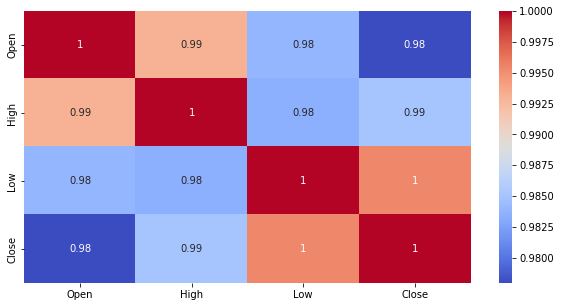

In [387]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.show()

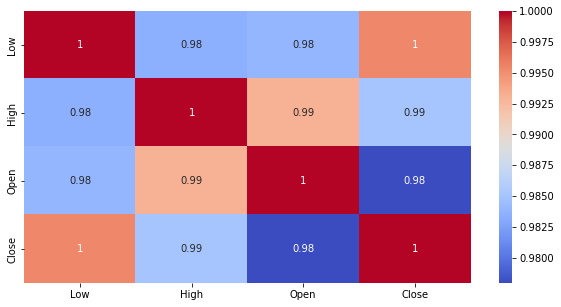

In [388]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

In [389]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [390]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = round(X.apply(zscore),3)

In [391]:
#applying log on dependent variable 
y = np.log10(df['Close'])

In [392]:
#Split our data into train and test datasets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 3)
X_test:  (37, 3)
y_train:  (148,)
y_test:  (37,)


In [393]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [394]:
X_train

,Open,High,Low
113,0.371,0.367,0.429
8,-0.906,-0.897,-0.868
96,-0.133,-0.148,-0.409
170,-0.467,-0.411,-0.594
45,-0.968,-0.930,-0.934
...,...,...,...
103,-0.446,-0.504,-0.402
67,-0.533,-0.551,-0.530
117,0.581,0.535,0.655
47,-0.811,-0.802,-0.791


In [395]:
y_train

Date
2014-12-01    2.189125
2006-03-01    1.302764
2013-07-01    1.811307
2019-09-01    1.617525
2009-04-01    1.188928
                ...   
2014-02-01    1.784974
2011-02-01    1.710033
2015-04-01    2.225206
2009-06-01    1.472464
2019-11-01    1.834421
Name: Close, Length: 148, dtype: float64

In [396]:
X_test

,Open,High,Low
33,-0.726,-0.757,-0.730
125,0.481,0.362,0.426
173,-0.360,-0.430,-0.596
112,0.320,0.262,0.412
61,-0.468,-0.445,-0.395
18,-0.792,-0.773,-0.747
137,1.317,1.215,1.355
7,-0.913,-0.935,-0.874
5,-0.933,-0.959,-0.901
162,0.784,1.133,0.948


In [397]:
y_test

Date
2008-04-01    1.532245
2015-12-01    2.162056
2019-12-01    1.671636
2014-11-01    2.152533
2010-08-01    1.793930
2007-01-01    1.479431
2016-12-01    2.364101
2006-02-01    1.207365
2005-12-01    1.137037
2019-01-01    2.288473
2018-03-01    2.484157
2019-07-01    1.960471
2015-11-01    2.185542
2011-06-01    1.795045
2018-06-01    2.530968
2019-03-01    2.439412
2010-10-01    1.856487
2008-08-01    1.428621
2017-01-01    2.445760
2010-01-01    1.697578
2009-03-01    0.999131
2014-09-01    2.048053
2019-05-01    2.170115
2010-07-01    1.770778
2016-06-01    2.344981
2019-10-01    1.847881
2016-09-01    2.399414
2005-11-01    1.127429
2014-07-01    2.034267
2011-01-01    1.720903
2018-08-01    2.535800
2017-07-01    2.558661
2012-09-01    1.883321
2015-03-01    2.213013
2007-09-01    1.616581
2010-02-01    1.675045
2016-10-01    2.404012
Name: Close, dtype: float64

In [398]:
#Applying Linear Regression 
lr = LinearRegression()
lin_reg = lr.fit(X_train,y_train)

In [399]:
#Checking efficiency of training model
lin_reg.score(X_train,y_train)

0.8091152094340809

In [400]:
#getting regression coefficients 
print('Intercept:',lin_reg.intercept_)
print('Regressors: \n',lin_reg.coef_)

Intercept: 1.8262495893435555
Regressors: 
 [-0.13270791  0.29061643  0.23265022]


In [401]:
#Predict y_test on the basis of train sets
y_pred = lin_reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.53276423 1.96672923 1.61039984 1.95577646 1.66713574 1.53291803
 2.3198133  1.47234925 1.46174706 2.27202742 2.59746859 1.77196223
 2.0045669  1.63999469 2.73573264 2.44754382 1.69457789 1.51594662
 2.45298264 1.61176382 1.44547559 1.87456785 2.0156832  1.63781436
 2.25493358 1.63516541 2.42563442 1.46032674 1.83171021 1.62287589
 2.8811247  2.77612524 1.69605907 2.0717636  1.56161009 1.59665024
 2.42253306]


In [402]:
test_df['LR Predicted Closing Price'] = 10**y_pred
test_df.head(3)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,34.06,34.100773
2015-12-01,145.23,92.625215
2019-12-01,46.95,40.775551


In [403]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(y_test,data)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  return

In [404]:
evaluation_metrics(y_pred)

Mean Squared Error:  0.031980526670162296
Root Mean Squared Error:  0.17883100030521076
R2:  0.8283222778327901
Adjusted R2:  0.8127152121812256


In [405]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_percentage_error
MAE  = mean_absolute_percentage_error

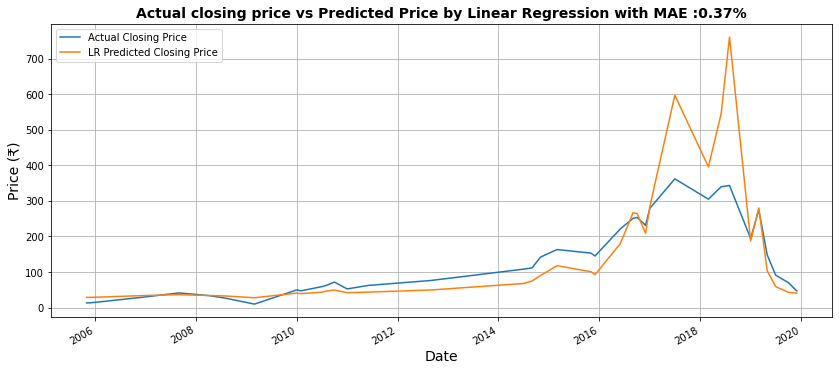

In [406]:
#Graph between Actual Close price and Predicted Price
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

# **RIDGE REGRESSION**

In [407]:
ridge  = Ridge(alpha=0.1 , max_iter= 5000)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, max_iter=5000)

In [408]:
ridge.score(X_train,y_train)

0.8090819139969196

In [409]:
y_pred_r = ridge.predict(X_test)

In [410]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_r)

Mean Squared Error:  0.03189782363389192
Root Mean Squared Error:  0.1785996182355716
R2:  0.8287662439071969
Adjusted R2:  0.8131995388078512


**Applying cross validation and Hyperparameter Tuning in Ridge**

In [411]:
# Applying ridge regression to penalize our parameters
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [412]:
print("Best Alpha :" ,ridge_regressor.best_params_)
print("\n By Using ",ridge_regressor.best_params_, " Negative mean squared error is: ", ridge_regressor.best_score_)

Best Alpha : {'alpha': 2}

 By Using  {'alpha': 2}  Negative mean squared error is:  -0.035188435005364935


In [413]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [414]:
#Getting evaluation metrics for Ridge
evaluation_metrics(y_pred_ridge)

Mean Squared Error:  0.031687434139447995
Root Mean Squared Error:  0.17800964619774962
R2:  0.8298956558629963
Adjusted R2:  0.8144316245778142


In [415]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(3)

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2008-04-01,34.06,34.560951
2015-12-01,145.23,95.961163
2019-12-01,46.95,42.583266


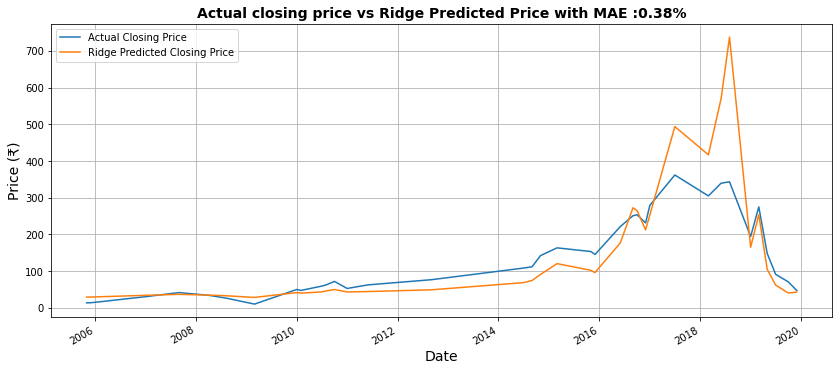

In [416]:
#Graph between Actual Close price and Ridge Predicted Price
ridge_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Ridge Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_ridge)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

## **LASSO REGRESSION**

In [457]:
lasso  = Lasso(alpha=0.0001 , max_iter= 6000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=6000)

In [458]:
lasso.score(X_train, y_train)

0.8090939585511401

In [419]:
y_pred_L = lasso.predict(X_test)

In [420]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_L)

Mean Squared Error:  0.031912411408134535
Root Mean Squared Error:  0.17864045288829328
R2:  0.8286879338818715
Adjusted R2:  0.8131141096893143


In [421]:
# Cross Validation 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [422]:
print("Best fit alpha value:" ,lasso_regressor.best_params_)
print("\nBy Using ",lasso_regressor.best_params_, " Negative mean squared error is: ", lasso_regressor.best_score_)

Best fit alpha value: {'alpha': 0.0014}

By Using  {'alpha': 0.0014}  Negative mean squared error is:  -0.03537004510229651


In [423]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [424]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_lasso)

Mean Squared Error:  0.03173683133331823
Root Mean Squared Error:  0.17814834080989422
R2:  0.829630482064811
Adjusted R2:  0.814142344070703


In [425]:
# Introducing Data frame for Actual closing price and Lasso Predicted Closing Price 
test_df['Lasso Predicted Closing Price'] = 10**y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_df.head(3)

,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,34.06,34.460010
2015-12-01,145.23,95.489561
2019-12-01,46.95,42.058957


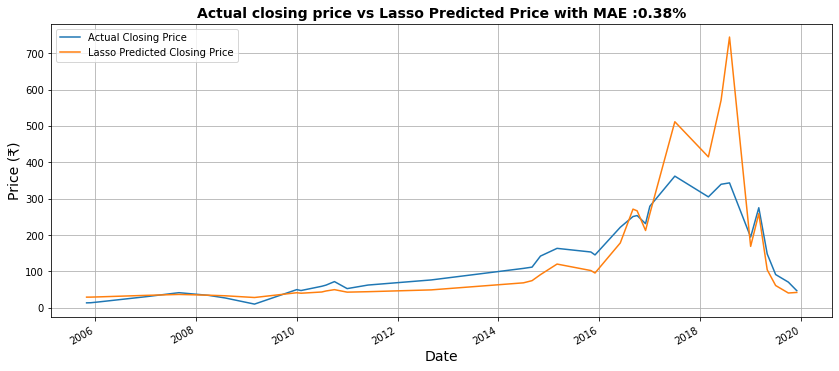

In [426]:
#Graph between Actual Close price and Lasso Predicted Price
lasso_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Lasso Predicted Price with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_lasso)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

# **ElasticNet Regression Model**

In [427]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [428]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [429]:
elasticnet.score(X_train, y_train)

0.7867673211919042

In [430]:
print('Intercept of Elastic Model: ',elasticnet.intercept_)
print('Regressors of Elastic Model:\n ',elasticnet.coef_)

Intercept of Elastic Model:  1.8215899366211252
Regressors of Elastic Model:
  [0.07655738 0.11575009 0.13707587]


In [431]:
y_pred_en = elasticnet.predict(X_test)

In [432]:
#getting evaluation metrics for Ridge
evaluation_metrics(y_pred_en)

Mean Squared Error:  0.034361585597306475
Root Mean Squared Error:  0.18536878269359833
R2:  0.8155402878057342
Adjusted R2:  0.798771223060801


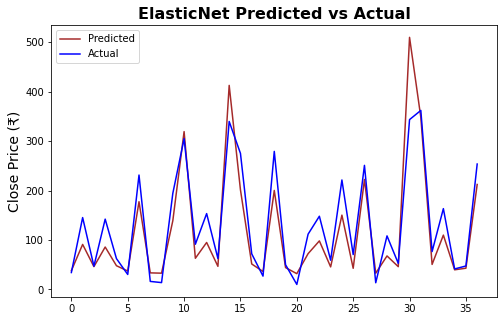

In [433]:
# Plot of ElasticNet Actual vs Predicted
plt.figure(figsize=(8,5))
plt.plot(10**y_pred_en,color = 'brown')
plt.plot(np.array(10**y_test),color = 'blue')
plt.legend(["Predicted","Actual"])
plt.ylabel('Close Price (₹)',fontsize = 14)
plt.title('ElasticNet Predicted vs Actual',fontweight = 'bold',fontsize = 16)
plt.show()

**Applying Cross Validation for ElasticNet Regression Model**

In [434]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [435]:
print("Best fit alpha value :" ,elastic_regressor.best_params_)
print("\nBy Using ",elastic_regressor.best_params_, " Negative mean squared error is: ", elastic_regressor.best_score_)

Best fit alpha value : {'alpha': 0.01, 'l1_ratio': 0.4}

By Using  {'alpha': 0.01, 'l1_ratio': 0.4}  Negative mean squared error is:  -0.03517529417122726


In [436]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [437]:
#Getting Evaluation metrics for ElasticNet after applying Cross-Validation
evaluation_metrics(y_pred_elastic)

Mean Squared Error:  0.03159601336566866
Root Mean Squared Error:  0.17775267470749537
R2:  0.8303864204574344
Adjusted R2:  0.8149670041353829


In [438]:
# Inroducing dataframe for Actual closing price and ElasticNet predicted Closing Price 
test_df['ENet Predicted Closing Price'] = 10**y_pred_elastic
Enet_df = test_df.loc[:,['Actual Closing Price','ENet Predicted Closing Price']]
Enet_df.head(3)

,Actual Closing Price,ENet Predicted Closing Price
Date,,
2008-04-01,34.06,34.667388
2015-12-01,145.23,95.021960
2019-12-01,46.95,42.296944


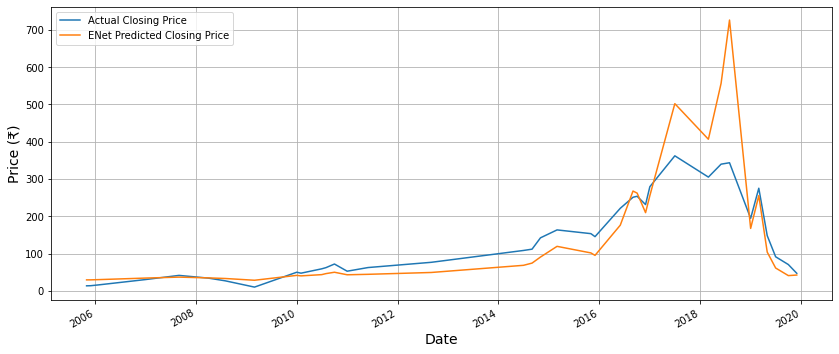

In [439]:
#Graph between Actual Close price and ElasticNet Predicted Price
Enet_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)

plt.legend()
plt.show()

**Over all graphical representation between Actual Closing Price and Predicted Closing Price by All Algorithms.**

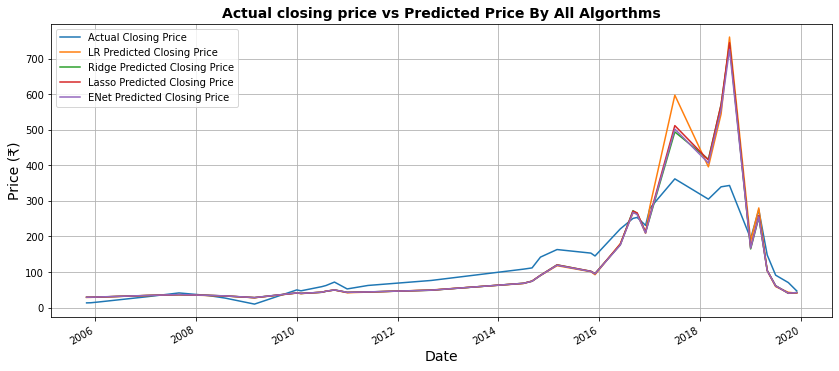

In [440]:
#Graph between Actual Close price and Predicted Price by All Algorithms.
test_df.plot(figsize = (14,6))
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price By All Algorthms',fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

**Final Matrix**

In [459]:
#Comparison between algorithms 
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [lin_reg,ridge,lasso,elasticnet]

def error_matrix(Y):
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,Y)
  adj_r2 = 1-(1-r2_score(y_test,Y))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))

  return MSE,RMSE,r_2,adj_r2
def training_accuracy(models):
  train_accuracy = []
  for model in reg_models:
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
  return train_accuracy


accuracy_df = pd.DataFrame(index = accuracy_list)
accuracy_df['Linear Regression'] = error_matrix(y_pred)
accuracy_df['Ridge'] = error_matrix(y_pred_ridge)
accuracy_df['Lasso'] = error_matrix(y_pred_lasso)
accuracy_df['ElasticNet'] = error_matrix(y_pred_elastic)
accuracy_df.loc['Training Accuracy'] = training_accuracy(reg_models)
accuracy_df

,Linear Regression,Ridge,Lasso,ElasticNet
MSE,0.031981,0.031687,0.031737,0.031596
RMSE,0.178831,0.178010,0.178148,0.177753
R2,0.828322,0.829896,0.829630,0.830386
Adjusted_R2,0.812715,0.814432,0.814142,0.814967
Training Accuracy,0.809115,0.808140,0.809094,0.786767
